In [110]:
import mplcyberpunk
import time
from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from webdriver_manager.firefox import GeckoDriverManager
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime

In [69]:
dias_uteis = pd.bdate_range('2022-08-31', '2023-02-07')

In [76]:
driver = webdriver.Firefox(service=Service(GeckoDriverManager().install()))

[WDM] - Downloading: 16.9kB [00:00, 8.00MB/s]                                   


In [71]:
def pegando_dados_di(url):
    
    driver.get(url)
    
    driver.implicitly_wait(5)

    local_tabela = '''
    /html/body/form[1]/table[3]/tbody/tr[3]/td[3]/table
    '''

    local_indice = '''
    /html/body/form[1]/table[3]/tbody/tr[3]/td[1]/table
    '''

    elemento = driver.find_element("xpath", local_tabela)

    elemento_indice = driver.find_element("xpath", local_indice)

    html_tabela = elemento.get_attribute('outerHTML')
    html_indice = elemento_indice.get_attribute('outerHTML')

    tabela = pd.read_html(html_tabela)[0]
    indice = pd.read_html(html_indice)[0]
    
    return tabela, indice

In [72]:
def tratando_dados_di(df_dados, indice):
    
    
    df_dados.columns = df_dados.loc[0]

    df_dados = df_dados['ÚLT. PREÇO']

    df_dados = df_dados.drop(0, axis = 0)

    indice.columns = indice.loc[0]

    indice_di = indice['VENCTO']

    indice = indice.drop(0, axis = 0)
    
    df_dados.index = indice['VENCTO']
    
    df_dados = df_dados.astype(int)

    df_dados = df_dados[df_dados != 0]

    df_dados = df_dados/1000

    return df_dados

In [73]:
def transformando_codigo_em_data(df):

    lista_datas = []

    for indice in df.index:

        letra = indice[0]
        ano = indice[1:3]

        mes = legenda[letra]

        data = f"{mes}-{ano}"

        data = datetime.strptime(data, "%b-%y")

        lista_datas.append(data)
        

    df.index = lista_datas  
    
    return df

In [74]:
legenda = pd.Series(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                    index = ['F', 'G', 'H', 'J', 'K', 'M', 'N', 'Q', 'U', 'V', 'X', 'Z'])

In [77]:
df = pd.DataFrame()

for dia in dias_uteis:
    
    try:
    
        dia = dia.strftime("%d/%m/%Y")

        url = f'''http://www2.bmf.com.br/pages/portal/bmfbovespa/boletim1/SistemaPregao1.asp?
        pagetype=pop&caminho=Resumo%20Estat%EDstico%20-%20Sistema%20Preg%E3o&Data={dia}
        &Mercadoria=DI1'''

        di, indice = pegando_dados_di(url = url)

        di_tratado = tratando_dados_di(di, indice)

        di_tratado = transformando_codigo_em_data(di_tratado)

        df[f"{dia}"] = di_tratado
        
    except:
        
        pass
    
driver.quit()


/tmp/ipykernel_87932/4177509388.py:19: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df[f"{dia}"] = di_tratado
/tmp/ipykernel_87932/4177509388.py:19: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df[f"{dia}"] = di_tratado
/tmp/ipykernel_87932/4177509388.py:19: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df[f"{dia}"] = di_tratado
/tmp/ipykernel_87932/4177509388.py:19: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.


/tmp/ipykernel_87932/4177509388.py:19: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df[f"{dia}"] = di_tratado
/tmp/ipykernel_87932/4177509388.py:19: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df[f"{dia}"] = di_tratado
/tmp/ipykernel_87932/4177509388.py:19: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df[f"{dia}"] = di_tratado
/tmp/ipykernel_87932/4177509388.py:19: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.


/tmp/ipykernel_87932/4177509388.py:19: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df[f"{dia}"] = di_tratado
/tmp/ipykernel_87932/4177509388.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{dia}"] = di_tratado
/tmp/ipykernel_87932/4177509388.py:19: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df[f"{dia}"] = di_tratado
/tmp/ipykernel_87932/4177509388.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

In [79]:
df = df.drop(["2022-09-01", "2022-10-01", "2022-11-01", "2022-12-01", "2023-01-01", "2023-02-01"] , axis = 0)

df

,31/08/2022,01/09/2022,02/09/2022,05/09/2022,06/09/2022,08/09/2022,09/09/2022,12/09/2022,13/09/2022,14/09/2022,...,25/01/2023,26/01/2023,27/01/2023,30/01/2023,31/01/2023,01/02/2023,02/02/2023,03/02/2023,06/02/2023,07/02/2023
2023-03-01,13.745,13.705,13.715,13.700,13.785,13.750,13.755,13.770,13.815,13.780,...,13.656,13.656,13.654,13.652,13.650,13.656,13.654,13.652,13.650,13.654
2023-04-01,13.735,13.690,13.680,13.685,13.765,13.755,13.730,13.755,13.810,13.780,...,13.666,13.662,13.666,13.662,13.666,13.666,13.664,13.670,13.660,13.660
2023-05-01,13.705,13.690,13.670,13.655,13.770,13.740,13.735,13.750,13.790,13.790,...,13.690,13.700,13.695,13.675,13.680,13.680,13.678,13.692,13.696,13.682
2023-06-01,13.695,13.645,13.600,13.600,13.710,13.690,13.700,13.740,13.795,13.795,...,13.695,13.695,13.695,13.695,13.695,13.685,13.705,13.765,13.725,13.725
2023-07-01,13.620,13.550,13.535,13.530,13.695,13.655,13.615,13.670,13.740,13.720,...,13.695,13.695,13.720,13.715,13.710,13.710,13.720,13.790,13.770,13.750
2023-08-01,13.520,13.505,13.500,13.440,13.645,13.600,13.535,13.600,13.630,13.660,...,13.710,13.710,13.725,13.725,13.715,13.745,13.735,13.835,13.825,13.740
2023-10-01,13.340,13.230,13.220,13.195,13.450,13.380,13.310,13.385,13.490,13.475,...,13.635,13.645,13.695,13.680,13.670,13.665,13.735,13.855,13.830,13.750
2024-01-01,13.005,12.850,12.845,12.820,13.120,12.995,12.935,13.020,13.155,13.140,...,13.490,13.505,13.570,13.555,13.545,13.535,13.690,13.830,13.795,13.680
2024-04-01,12.740,12.540,12.535,12.505,12.825,12.675,12.590,12.675,12.825,12.815,...,13.320,13.340,13.420,13.415,13.390,13.370,13.605,13.740,13.710,13.580
2024-07-01,12.445,12.215,12.200,12.185,12.480,12.300,12.220,12.310,12.460,12.470,...,13.070,13.120,13.205,13.245,13.205,13.155,13.430,13.590,13.540,13.455


In [80]:
df.index.name = 'indice'

In [104]:
df.to_csv("dados_di.csv")

In [ ]:
df

In [82]:
%matplotlib notebook

In [111]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from datetime import date
import matplotlib.dates as mdate
import mplcyberpunk

os.chdir('/home/brenno/Documentos/Instagram/dados')

dados_di = pd.read_csv("dados_di.csv", index_col='indice')

dados_di.index = pd.to_datetime(dados_di.index)

dados_di = dados_di.ffill()

,31/08/2022,01/09/2022,02/09/2022,05/09/2022,06/09/2022,08/09/2022,09/09/2022,12/09/2022,13/09/2022,14/09/2022,...,25/01/2023,26/01/2023,27/01/2023,30/01/2023,31/01/2023,01/02/2023,02/02/2023,03/02/2023,06/02/2023,07/02/2023
indice,,,,,,,,,,,,,,,,,,,,,
2023-03-01,13.745,13.705,13.715,13.700,13.785,13.750,13.755,13.770,13.815,13.780,...,13.656,13.656,13.654,13.652,13.650,13.656,13.654,13.652,13.650,13.654
2023-04-01,13.735,13.690,13.680,13.685,13.765,13.755,13.730,13.755,13.810,13.780,...,13.666,13.662,13.666,13.662,13.666,13.666,13.664,13.670,13.660,13.660
2023-05-01,13.705,13.690,13.670,13.655,13.770,13.740,13.735,13.750,13.790,13.790,...,13.690,13.700,13.695,13.675,13.680,13.680,13.678,13.692,13.696,13.682
2023-06-01,13.695,13.645,13.600,13.600,13.710,13.690,13.700,13.740,13.795,13.795,...,13.695,13.695,13.695,13.695,13.695,13.685,13.705,13.765,13.725,13.725
2023-07-01,13.620,13.550,13.535,13.530,13.695,13.655,13.615,13.670,13.740,13.720,...,13.695,13.695,13.720,13.715,13.710,13.710,13.720,13.790,13.770,13.750
2023-08-01,13.520,13.505,13.500,13.440,13.645,13.600,13.535,13.600,13.630,13.660,...,13.710,13.710,13.725,13.725,13.715,13.745,13.735,13.835,13.825,13.740
2023-10-01,13.340,13.230,13.220,13.195,13.450,13.380,13.310,13.385,13.490,13.475,...,13.635,13.645,13.695,13.680,13.670,13.665,13.735,13.855,13.830,13.750
2024-01-01,13.005,12.850,12.845,12.820,13.120,12.995,12.935,13.020,13.155,13.140,...,13.490,13.505,13.570,13.555,13.545,13.535,13.690,13.830,13.795,13.680
2024-04-01,12.740,12.540,12.535,12.505,12.825,12.675,12.590,12.675,12.825,12.815,...,13.320,13.340,13.420,13.415,13.390,13.370,13.605,13.740,13.710,13.580


<IPython.core.display.Javascript object>


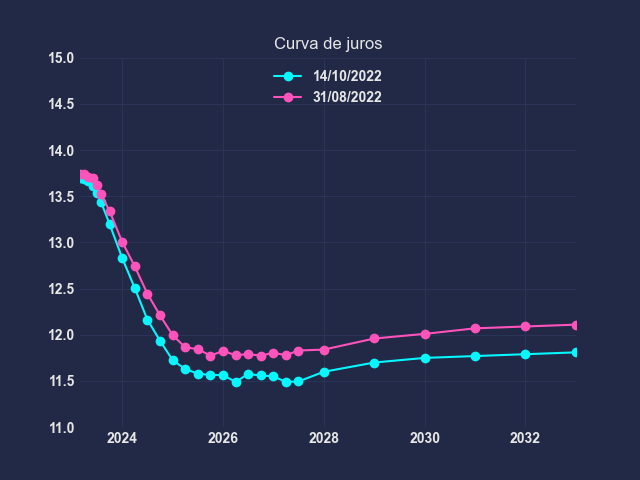

In [134]:
fig, ax = plt.subplots()
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.sans-serif'] = 'Nimbus Sans'
plt.rcParams['font.weight'] = 'bold'
ax.set_xlim(dados_di.index[0], dados_di.index[-1])
ax.set_ylim(11, 15)
plt.style.use("cyberpunk")
plt.title("Curva de juros")

lines = plt.plot([], marker = "o")
line = lines[0]
data = dados_di.iloc[ : , 0]
ax.plot(data.index, data.values, marker = "o")
ax.xaxis.set_major_locator(mdate.YearLocator(2))

def animate(i): 
    
    dia = dados_di.columns[i]
    data = dados_di.iloc[ : , (i - 1)] #select data range
    
    line.set_data((data.index, data.values))
    ax.legend([f'{dia}', '31/08/2022'],loc='upper center')
        
animacao = FuncAnimation(fig=fig, func = animate, frames= range(0, 110), interval = 20, repeat = False, blit = True)

animacao.save("curva_juros_2023.mp4", codec='mpeg4', fps = 30, bitrate= 4000, dpi = 300)

In [41]:
dado_Teste = dados_di.iloc[ : , (1 - 1)]

dado_Teste.index

Index(['2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01',
       '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01',
       '2024-01-01', '2024-04-01', '2024-07-01', '2024-10-01', '2025-01-01',
       '2025-04-01', '2025-07-01', '2025-10-01', '2026-01-01', '2026-04-01',
       '2026-07-01', '2026-10-01', '2027-01-01', '2027-04-01', '2027-07-01',
       '2027-10-01', '2028-01-01', '2029-01-01', '2030-01-01', '2031-01-01',
       '2032-01-01', '2033-01-01'],
      dtype='object', name='indice')

In [42]:
dados_di

,02/01/2023,03/01/2023,04/01/2023,05/01/2023,06/01/2023,09/01/2023,10/01/2023,11/01/2023,12/01/2023,13/01/2023,...,25/01/2023,26/01/2023,27/01/2023,30/01/2023,31/01/2023,01/02/2023,02/02/2023,03/02/2023,06/02/2023,07/02/2023
indice,,,,,,,,,,,,,,,,,,,,,
2023-03-01,13.670,13.666,13.666,13.666,13.664,13.666,13.664,13.662,13.664,13.660,...,13.656,13.656,13.654,13.652,13.650,13.656,13.654,13.652,13.650,13.654
2023-04-01,13.684,13.706,13.692,13.688,13.676,13.674,13.676,13.682,13.678,13.680,...,13.666,13.662,13.666,13.662,13.666,13.666,13.664,13.670,13.660,13.660
2023-05-01,13.715,13.745,13.740,13.720,13.705,13.700,13.705,13.705,13.700,13.695,...,13.690,13.700,13.695,13.675,13.680,13.680,13.678,13.692,13.696,13.682
2023-06-01,13.750,13.800,13.790,13.785,13.735,13.725,13.725,13.725,13.720,13.700,...,13.695,13.695,13.695,13.695,13.695,13.685,13.705,13.765,13.725,13.725
2023-07-01,13.740,13.845,13.820,13.795,13.735,13.715,13.735,13.710,13.725,13.705,...,13.695,13.695,13.720,13.715,13.710,13.710,13.720,13.790,13.770,13.750
2023-08-01,13.765,13.840,13.945,13.835,13.750,13.735,13.740,13.725,13.710,13.710,...,13.710,13.710,13.725,13.725,13.715,13.745,13.735,13.835,13.825,13.740
2023-09-01,13.735,13.835,13.935,13.820,13.810,13.715,13.755,13.720,13.680,13.690,...,13.690,13.685,13.705,13.705,13.685,13.730,13.750,13.865,13.790,13.750
2023-10-01,13.690,13.880,13.845,13.800,13.730,13.695,13.730,13.660,13.680,13.630,...,13.635,13.645,13.695,13.680,13.670,13.665,13.735,13.855,13.830,13.750
2023-11-01,13.680,13.805,13.840,13.770,13.735,13.680,13.715,13.665,13.630,13.610,...,13.615,13.620,13.660,13.665,13.650,13.665,13.735,13.875,13.790,13.735
